# Fundamentale Konzepte von Machine Learning 📚

In diesem Pytohn Notebook lernen wir Algorithmen kennen, welche aus Daten lernen und Muster erkennen.
Wir fokussieren uns auf das Konzept dahinter und probieren die Mathe grosszügig zu umschiffen wo möglich.
So erhalten wir ein Verständnis, wie etwas passiert, allerdings können wir es nicht begründen.

## Begriffe der KI 📖

TODO: Syncen mit Mermaid unten

- **Künstliche Intelligenz (KI)**: Systeme, die menschenähnliche kognitive Funktionen nachahmen.
- **Maschinelles Lernen (ML)**: Algorithmen, die aus Daten lernen und Muster erkennen.
- **Neuronale Netze**: Modellierung biologischer Gehirnstrukturen für komplexe Aufgaben.
- **Deep Learning**: Verwendung tiefer neuronaler Netze für hochkomplexe Probleme.

In [5]:
import base64
from IPython.display import Image, display
import matplotlib.pyplot as plt

def mm(graph):
    graphbytes = graph.encode("utf8")
    base64_bytes = base64.urlsafe_b64encode(graphbytes)
    base64_string = base64_bytes.decode("ascii")
    display(Image(url="https://mermaid.ink/img/" + base64_string))

mm("""
graph TD;
    KI["<b>Künstliche Intelligenz (KI)</b>\nKI ist ein Bereich der Informatik, der sich mit der Simulation menschlicher Intelligenz durch Maschinen befasst."]
    ML["<b>Maschinelles Lernen (ML)</b>\nML ist ein Teilgebiet der KI, das Algorithmen nutzt, um aus Daten zu lernen und Vorhersagen zu treffen."]
    DL["<b>Deep Learning (DL)</b>\nDL ist eine spezielle Form des ML, die tiefe neuronale Netze verwendet, um komplexe Muster zu erkennen."]
    NLP["<b>Natural Language Processing (NLP)</b>\nNLP ermöglicht Maschinen das Verstehen, Interpretieren und Erzeugen natürlicher Sprache."]
    CV["<b>Computer Vision (CV)</b>\nCV beschäftigt sich mit der automatisierten Verarbeitung und Analyse von Bildern und Videos."]
    RL["<b>Reinforcement Learning (RL)</b>\nRL ist eine Methode des ML, bei der ein Agent durch Belohnung oder Bestrafung lernt."]
    NN["<b>Neuronale Netze (NN)</b>\nNN sind von biologischen Gehirnstrukturen inspirierte Modelle zur Mustererkennung."]
    
    KI --> ML;
    ML --> DL;
    ML --> RL;
    KI --> NLP;
    KI --> CV;
    DL --> NN;

""")

## Lineare Regression - Ein einfaches ML-Modell 📈

Die lineare Regression ist eines der einfachsten Modelle im maschinellen Lernen. Sie versucht, eine lineare Beziehung zwischen einer unabhängigen Variable (x) und einer abhängigen Variable (y) zu finden. Die Gleichung lautet:

$y=m⋅x+b$

- $y$ = vorhergesagte abhängige Variable
- $x$ = unabhängige Variable
- $m$ = Steigung der Geraden
- $b$ = y-Achsenabschnitt

In [7]:
# Importieren der Bibliotheken
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [8]:
# Generieren eines Datensatzes
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)  # y = 4 + 3x + Rauschen

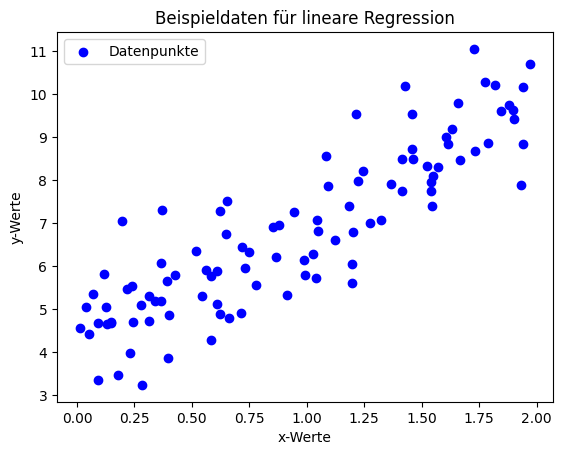

In [9]:
# Visualisieren der Daten
plt.scatter(X, y, color='blue', label='Datenpunkte')
plt.xlabel("x-Werte")
plt.ylabel("y-Werte")
plt.title("Beispieldaten für lineare Regression")
plt.legend()
plt.show()

In [13]:
# Modell erstellen und trainieren
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

# Die erstellte Funktion
print(f"y = {model.coef_[0][0]:.2f} * x + {model.intercept_[0]:.2f}")

y = 2.80 * x + 4.14


In [14]:
# Vorhersagen und Fehlerberechnung
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

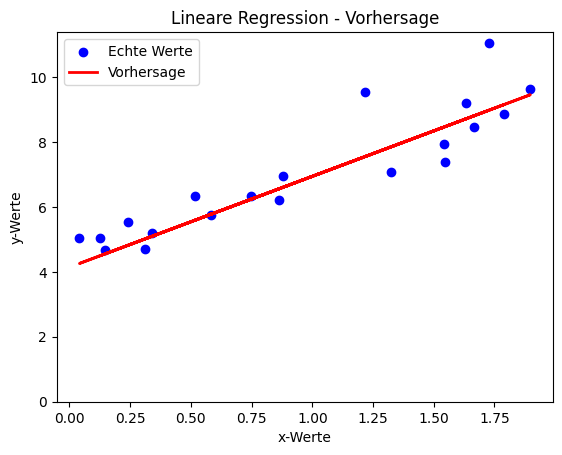

In [16]:
# Ergebnis visualisieren
plt.scatter(X_test, y_test, color='blue', label='Echte Werte')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Vorhersage')
plt.xlabel("x-Werte")
plt.ylabel("y-Werte")
plt.title("Lineare Regression - Vorhersage")
plt.legend()
plt.ylim(bottom=0)
plt.show()

Klassifikation - Ein grundlegendes ML-Modell 💡

Die Klassifikation versucht, Datenpunkte in verschiedene Kategorien oder Klassen einzuordnen, basierend auf ihren Eigenschaften.
Das Ziel ist es, eine Entscheidungsgrenze zu finden, die die Klassen möglichst gut trennt.

Ein klassisches Beispiel ist die binäre Klassifikation, bei der es zwei Klassen gibt (0 oder  1).

### Beispiel: E-Mail-Spam-Erkennung 📧
Ein häufiges Anwendungsbeispiel für die Klassifikation ist die Spam-Filterung.
Hierbei werden E-Mails basierend auf verschiedenen Merkmalen (z. B. bestimmte Wörter, Absender, Links) in zwei Klassen eingeteilt:

- Klasse 0: Normale E-Mail (kein Spam)
- Klasse 1: Spam-E-Mail

Ein Modell könnte trainiert werden, um anhand der Merkmale vorherzusagen, ob eine E-Mail als Spam eingestuft werden sollte oder nicht.

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [18]:
# Generieren eines Klassifikations-Datensatzes (E-Mail-Spam-Erkennungssimulation)
np.random.seed(42)
X = np.random.randn(200, 2)  # Zwei Features, die beispielsweise Wortanzahl und Anzahl verdächtiger Links repräsentieren
y = (X[:, 0] ** 2 + X[:, 1] ** 2 > 1).astype(int)  # Klassifizierung: 0 = Ham, 1 = Spam

In [19]:
# Aufteilen in Trainings- und Testdaten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Standardisieren der Daten
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
# Erstellen und Trainieren des Modells
model = SVC(kernel='rbf', random_state=42)
model.fit(X_train, y_train)

SVC(random_state=42)

In [22]:
# Vorhersagen treffen
y_pred = model.predict(X_test)

In [25]:
# Bewertung des Modells
print("Genauigkeit:", accuracy_score(y_test, y_pred))

Genauigkeit: 0.9


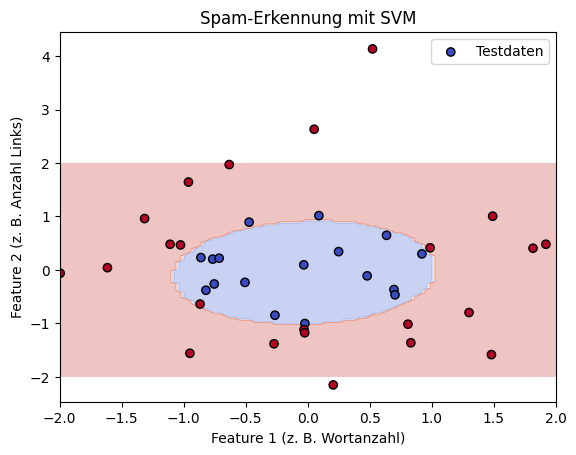

In [24]:
# Visualisierung der Klassifikation
xx, yy = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-2, 2, 100))
Z = model.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', cmap=plt.cm.coolwarm, label='Testdaten')
plt.xlabel("Feature 1 (z. B. Wortanzahl)")
plt.ylabel("Feature 2 (z. B. Anzahl Links)")
plt.title("Spam-Erkennung mit SVM")
plt.legend()
plt.show()
